In [22]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
import seaborn as sns
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font' , family = 'NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
drinks = pd.read_csv('drinks.csv')

In [3]:
drinks.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [3]:
drinks = drinks.fillna('OT')

In [5]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [6]:
#beer_servings와 wine_servings의 상관관계 구하기
drinks[['beer_servings' , 'wine_servings']].corr(method = 'pearson')

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [7]:
cols = ['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']

In [8]:
corr = drinks[cols].corr()

In [9]:
cols_view = ['beer', 'spirit', 'wine','alcohol']

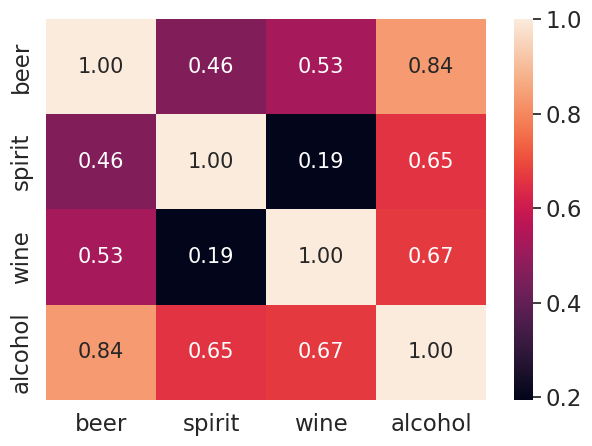

In [10]:

sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values , cbar = True , annot = True , fmt = '.2f' , yticklabels = cols_view , xticklabels = cols_view , annot_kws = {'size' : 15})
plt.tight_layout()
plt.show()


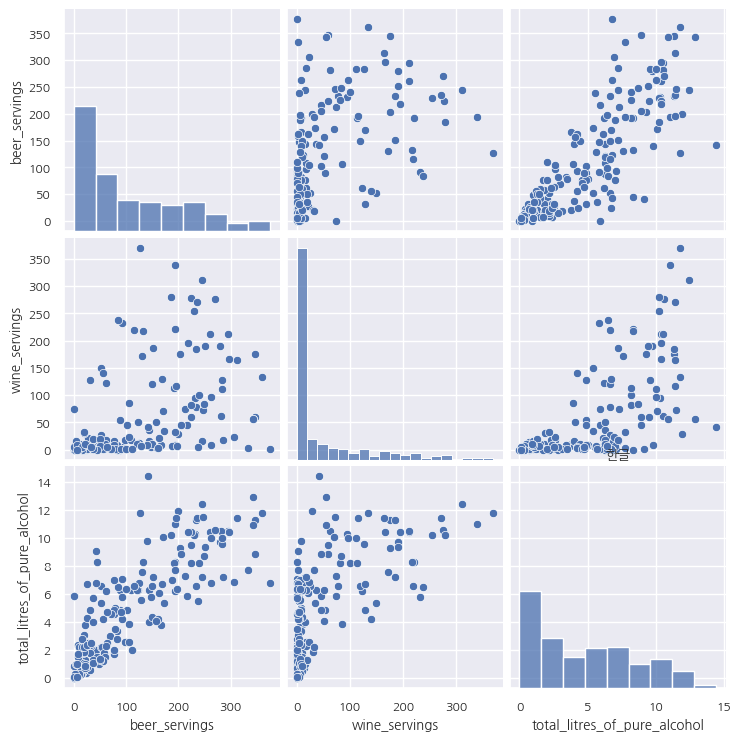

In [65]:
sns.pairplot(drinks[['beer_servings' , 'wine_servings' , 'total_litres_of_pure_alcohol']] , height = 2.5)
sns.set(font_scale = 0.8)
plt.title('한글')
plt.show()

In [12]:
data = drinks['continent'].value_counts()

In [13]:
data

AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: continent, dtype: int64

In [14]:
explode = (0,0,0,0.2,0,0)

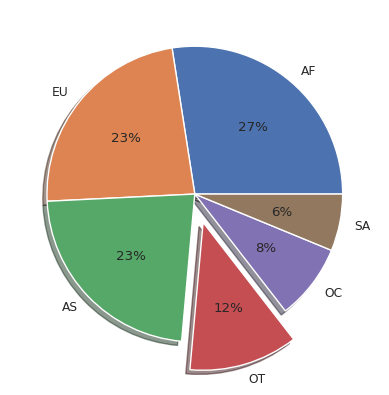

In [15]:
plt.pie(data , explode = explode , labels = data.index.tolist() , autopct = '%.0f%%' , shadow = True)
plt.show()

In [16]:
#대륙별 분석 : apply , agg

In [17]:
#대륙별 맥주 소비량에 대한 평균 , 최소 , 최대 , 합
result = drinks.groupby('continent').beer_servings.agg(['mean','min','max','sum'])

In [4]:
#전체 알코올 평균보다 더 많은 알코올을 섭취하는 대륙
avg = drinks['total_litres_of_pure_alcohol'].mean()

In [5]:
rs = drinks.groupby('continent').total_litres_of_pure_alcohol.mean().values>avg

In [6]:
result = drinks.groupby('continent').total_litres_of_pure_alcohol.mean()[rs]

In [7]:
result

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

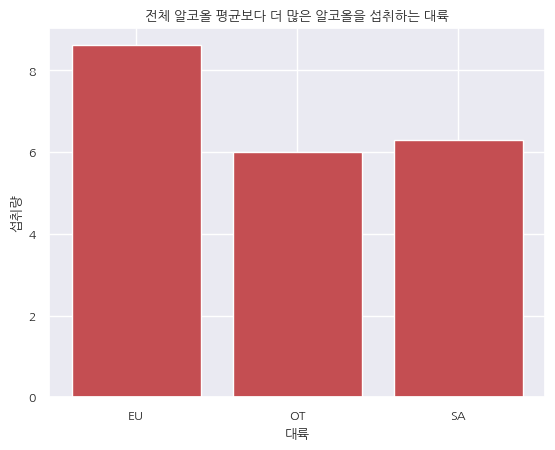

In [20]:
plt.rc('font' , family = 'NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False
plt.bar(result.index , result.values , color = 'r')
plt.title('전체 알코올 평균보다 더 많은 알코올을 섭취하는 대륙')
plt.xlabel('대륙')
plt.ylabel('섭취량')
plt.show()

In [23]:
#평균 beer_serving이 가장 높은 대륙
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [33]:
drinks.groupby('continent').beer_servings.mean()[drinks.groupby('continent').beer_servings.mean().values==drinks.groupby('continent').beer_servings.mean().max()]

continent
EU    193.777778
Name: beer_servings, dtype: float64

In [35]:
drinks.groupby('continent').beer_servings.mean()[drinks.groupby('continent').beer_servings.mean().idxmax()]

193.77777777777777

In [37]:
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()
beer_continent

'EU'

In [38]:
result = drinks.groupby('continent').beer_servings.agg(['mean','min','max','sum'])

In [39]:
result

,mean,min,max,sum
continent,,,,
AF,61.471698,0,376,3258
AS,37.045455,0,247,1630
EU,193.777778,0,361,8720
OC,89.687500,0,306,1435
OT,145.434783,1,285,3345
SA,175.083333,93,333,2101


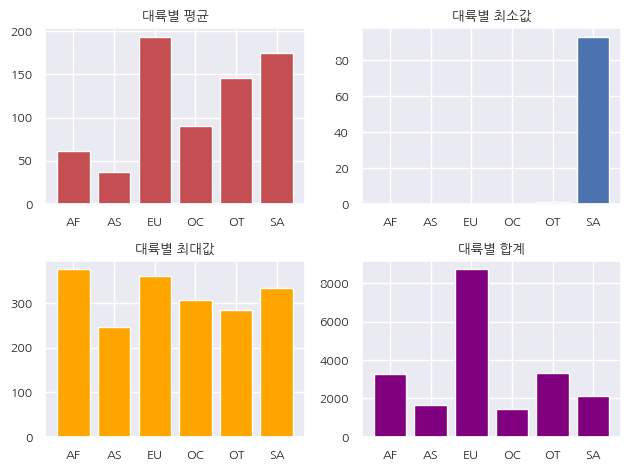

In [50]:
plt.rc('font' , family = 'NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False
plt.subplot(2,2,1)
plt.title('대륙별 평균')
plt.bar(result.index , result['mean'] , color = 'r')
plt.subplot(2,2,2)
plt.title('대륙별 최소값')
plt.bar(result.index , result['min'] , color = 'b')
plt.subplot(2,2,3)
plt.title('대륙별 최대값')
plt.bar(result.index,result['max'] , color = 'orange')
plt.subplot(2,2,4)
plt.title('대륙별 합계')
plt.bar(result.index , result['sum'] , color = 'purple')
plt.tight_layout()
plt.show()

In [ ]:
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()
n_groups = len(result.index)
index = np.arange(n_groups)
bar_width = 0.1

graph1 = plt.bar(index , means , bar_width , color = 'r' , label = 'mean')
graph2 = plt.bar(index + bar_width , mins , bar_width , color = 'b' , label = 'min')
graph1 = plt.bar(index + bar_width * 2, maxs  , bar_width , color = 'green' , label = 'max')
graph1 = plt.bar(index + bar_width * 3 , sums , bar_width , color = 'orange' , label = 'sum')
plt.legend()
plt.show()

In [54]:
rs = drinks.groupby('continent').total_litres_of_pure_alcohol.mean()
rs

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [55]:
total_mean = drinks.total_litres_of_pure_alcohol.mean()
total_mean

4.717098445595855

In [59]:
rs['total'] = total_mean

In [60]:
rs

continent
AF       3.007547
AS       2.170455
EU       8.617778
OC       3.381250
OT       5.995652
SA       6.308333
total    4.717098
Name: total_litres_of_pure_alcohol, dtype: float64

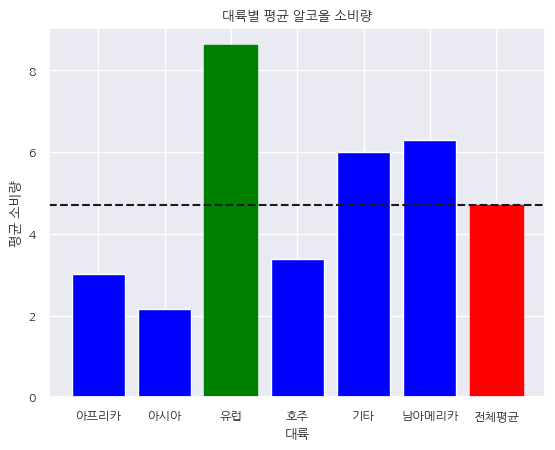

In [94]:
plt.rc('font' , family = 'NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False
bar_list = plt.bar(rs.index , rs.values , color = 'blue')
bar_list[-1].set_color('red')
plt.title('대륙별 평균 알코올 소비량')
plt.xlabel('대륙')
plt.ylabel('평균 소비량')
plt.xticks(rs.index , ['아프리카','아시아','유럽','호주','기타','남아메리카','전체평균'])
plt.axhline(rs['total'], 0, 1, color = 'k' , linestyle = '--')
bar_list[2].set_color('green')
plt.show()

In [95]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF
